In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from dataset import load_dataset

ModuleNotFoundError: No module named 'tensorflow.python'

In [3]:
# Load the dataset from the specified dataset
x_train_original, y_train_original, x_test_original, y_test_original = load_dataset()

# Preprocess input data for Keras
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test  = keras.utils.to_categorical(y_test_original, num_classes=10)

# Normalize the training and test vectors
x_train = x_train_original.astype('float32')
x_test  = x_test_original.astype('float32')
x_train /= 255
x_test /= 255

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))
# model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=64, validation_split=0.2)

# Plot the validation accuracy
plt.plot(history.history['val_accuracy'])

# Evaluate the model
loss, acc = model.evaluate(x_test, y_test)
print('Test loss: {%.2f}'.format(loss))
print('Test accuracy: {%.2f}'.format(acc))


In [ ]:
# The predict_classes function outputs the highest probability class
predicted_classes = model.predict_classes(x_test)
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

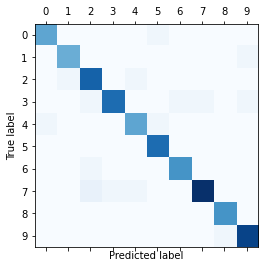

In [17]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_original, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");